#Philly Crime Map



In [14]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import StamenTonerTilesAccess as STT

#Import dataframe

In [2]:
philly06 = pd.read_csv('GIS_POLICE.INCIDENTS_2006.csv')

## Find Max and Min Lat and Longitude values to calculate where the edges of the map tiles should be

In [15]:
# Find Max and Min Latitude value
ymax = philly06['POINT_Y'].max()  #Northmost point : 40.137445
ymin = philly06['POINT_Y'].min()  #Southmost point : 39.875032
# Find Max and Min Longitude value
xmax = philly06['POINT_X'].max()  #Eastmost point : -74.957504
xmin = philly06['POINT_X'].min()#Westmost point : -75.27426
lonlat = zip(philly06.POINT_X.values, philly06.POINT_Y.values)
lat_deg = ymax
lon_deg = xmin
delta_lat = ymax-ymin
delta_long = xmax-xmin

##Set Zoom level and import Map tiles

Importing OpenStreetMap (StamenToner version) tiles using function from StamenTonerTiles Access which converts the lon and lat and zoom info to the URL for each tile  

In [16]:
zoom = 11
a, bbox = STT.getImageCluster(lat_deg, lon_deg, delta_lat,  delta_long, zoom)

Opening: http://tile.stamen.com/toner/11/595/772.png
Opening: http://tile.stamen.com/toner/11/595/773.png
Opening: http://tile.stamen.com/toner/11/595/774.png
Opening: http://tile.stamen.com/toner/11/596/772.png
Opening: http://tile.stamen.com/toner/11/596/773.png
Opening: http://tile.stamen.com/toner/11/596/774.png
Opening: http://tile.stamen.com/toner/11/597/772.png
Opening: http://tile.stamen.com/toner/11/597/773.png
Opening: http://tile.stamen.com/toner/11/597/774.png


In [13]:
delta_long

0.31675599999999804

##Plot the 2006 crime incidents onto the map

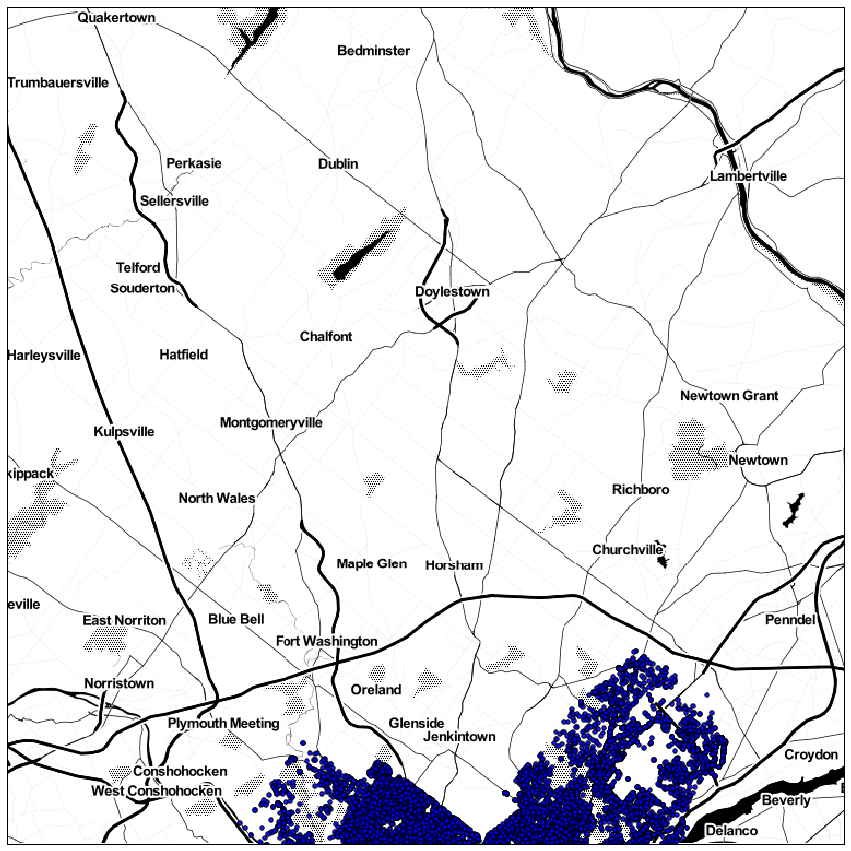

In [18]:
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(111)
m = Basemap(
    llcrnrlon=bbox[0], llcrnrlat=bbox[1],
    urcrnrlon=bbox[2], urcrnrlat=bbox[3],
    projection='merc', ax=ax
)
ls_points = [m(x,y) for x,y in lonlat]  # Need to fix so it can take lists of points as input, right now it's fixed
m.imshow(a, interpolation='nearest', origin='upper')
ax.scatter([point[0] for point in ls_points],
           [point[1] for point in ls_points],
           alpha = 0.9)